In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import random
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.model_selection import train_test_split

In [8]:


df = image_dataset_from_directory(
    "my_dataset/",
    image_size = (28, 28),
    color_mode = "grayscale",
    label_mode = "int",
    shuffle = True
)

Found 80 files belonging to 4 classes.


In [9]:

X_all = []
y_all = []

for images, labels in df:
    X_all.append(images.numpy())
    y_all.append(labels.numpy())

X = np.concatenate(X_all)
y = np.concatenate(y_all)


In [10]:
X_train, y_train, X_test, y_test = X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train = X_train / 255.0 
X_test = X_test / 255.0 

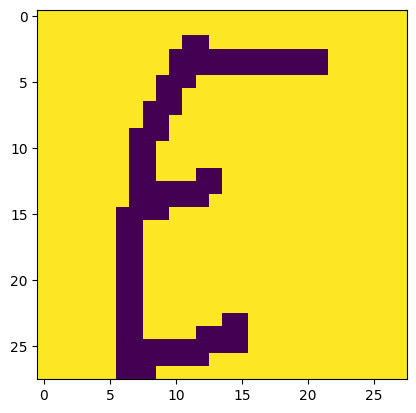

In [36]:
index = random.randint(0, len(y_test))
plt.imshow(X_test[index, : ])

In [38]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3, 3), input_shape = (28, 28, 1), activation = "relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(32,(3, 3), activation = "relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(32,(3, 3), activation = "relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation = "relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(4, activation = "sigmoid"))

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [39]:
history = model.fit(X_train, y_train, epochs = 50, validation_data= (X_test,y_test))

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.3229 - loss: 1.3886 - val_accuracy: 0.4375 - val_loss: 1.3646
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4688 - loss: 1.3588 - val_accuracy: 0.5000 - val_loss: 1.3507
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6354 - loss: 1.3423 - val_accuracy: 0.6250 - val_loss: 1.3327
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6458 - loss: 1.3180 - val_accuracy: 0.6250 - val_loss: 1.3176
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6042 - loss: 1.2931 - val_accuracy: 0.6250 - val_loss: 1.2971
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6354 - loss: 1.2760 - val_accuracy: 0.6875 - val_loss: 1.2737
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6146 - loss: 1.2556 - val_accuracy: 0.7500 - val_loss: 1.2425
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6458 - loss: 1.2083 - val_accuracy: 0.8125 - val_loss: 1.2057

In [40]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9375 - loss: 0.3700


[0.36995136737823486, 0.9375]

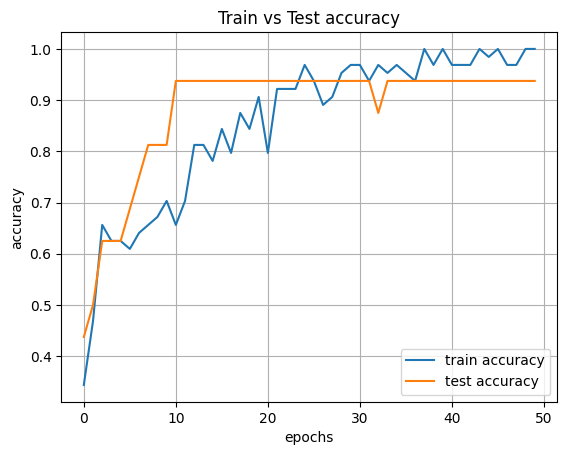

In [41]:
plt.plot(history.history["accuracy"], label = "train accuracy")
plt.plot(history.history["val_accuracy"], label = "test accuracy")
plt.title("Train vs Test accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()